<div style="background:#d4d6fa; color:#000; padding:10px">
    <p><big><b> Комментарий тимлида: </b></big></p> 
Здравствуй, Родион! Меня зовут Москвин Антон! Я буду использовать стандартную цветовую разметку комментариев:
<div class="alert alert-success">
        <strong>👍 Зелёным</strong> цветом я буду выделять удачные и элегантные решения, на которые можно опираться в будущих проектах. 
    </div> 
    <div class="alert alert-warning">
        <strong>⚠️Желтым</strong> будет выделено то, что в следующий раз стоит сделать по-другому. Одно-два таких замечаний в проекте допустимы, но если их будет больше, то нужно будет внести изменения.
    </div>
    <div class="alert alert-danger">
        <strong>⛔️Красным</strong> - то, что необходимо исправить, прежде чем я смогу принять твой проект.
    </div> 
Пожалуйста, НЕ УДАЛЯЙ и НЕ ПЕРЕДВИГАЙ их.
    <br>СЛЕДУЮЩИЙ этап должен выполняться В ЭТОМ же ноутбуке!
</div>


<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Привет, Антон! В таких комментариях я буду указывать на внесённые изменения или задавать вопросы, если ты не против.
</div>

# Итоговый проект "Телеком"

<div class='alert alert-success'> 👍
Спасибо за описание задачи, важно держать такую информацию перед глазами!


Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

<b>Услуги оператора</b>

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

<b>План работы</b>

<b>1) Загрузка данных, подготовка данных и первичный анализ</b>

На первом этапе будет произведена загрузка представленных данных, их описание, предобработка пропусков и дубликатов, подготовка данных - удаление лишних признаков (даты), добавление новых признаков (например, время жизни клиента в днях), выделение бинарного целевого признака (ушёл клиент или нет), первичный анализ.

<b>2) Исследовательский анализ данных</b>

На втором этапе работы будет произведен поиск корреляции признаков в представленных данных, построение графиков рассеяния. После этого произведём отбор признаков.

<b>3) Моделирование</b>

На третьем этапе будет произведено стратифицированное разделение данных на две выборки - тренировочную и тестовую. На тренировочной выборке будут обучены необходимые энкодеры и скейлеры для подготовки данных и обучены две модели для сравнения - одна простая (случайный лес) и одна бустинг-модель (CatBoost). При обучении моделей будет произведён подбор гиперпараметров и кросс-валидация по целевой метрике ROC-AUC.

<b>4) Тестирование и вывод</b>

На четвертом этапе модель с лучшим значением метрики ROC-AUC с предыдущего этапа будет испытана на тестовой выборке, по результатам этого тестирования будет написан вывод о полученной модели. Цель по метрике на тестовой выборке - ROC-AUC > 0.85.

<div class='alert alert-success'> 👍	    
У тебя получился отличный план, продолжай работу над проектом в соответствии с его пунктами! Но 3 пункт все таки лучше назвать "Моделирование" :) 


<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Переименовал третий пункт в "Моделирование".
</div>

## 1) Загрузка данных, подготовка данных и первичный анализ

In [1]:
pip install association_metrics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import association_metrics as am
import seaborn as sns
import phik
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from matplotlib import rcParams
from phik.report import plot_correlation_matrix

from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler)
from sklearn.metrics import (roc_auc_score, 
                             roc_curve, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay)

RANDOM_STATE = 130223

Создадим функцию для первичного анализа данных.

In [5]:
def data_analyze(data):
    print('='*100)
    rows_count, columns_count = data.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    display(data.head(5))
    display(data.describe(include='all'))
    data.info()
    print('='*100)

 У нас есть четыре csv файла - contract, internet, personal, phone. Загрузим каждый в отдельную переменную, проведём первичный анализ и оценим содержание каждого отдельно.

In [6]:
PATH = '/datasets/final_provider/' #для работы в тренажёре
#PATH = 'F:/Jupiter_Notebook/final_provider/final_provider/' #для работы локально

<b>Contract</b>

In [7]:
#ls /datasets/final_provider/

<div class='alert alert-danger'> ⛔️ 
Данные должны открываться в тренажере 

<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Проект выполняю локально - поэтому выше добавил ячейку с переменной PATH. Перед отправкой на проверку, перекину PATH на путь для тренажёра, чтобы всё выполнялось там.
</div>

In [8]:
contract = pd.read_csv(f'{PATH}contract.csv')

In [9]:
data_analyze(contract)

Количество стобцов: 8
Количество строк: 7043


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7321-ZNSLA,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


<div class='alert alert-success'> 👍	
Хорошее первичное знакомство с данными, не забывай про метод describe и используй его с  аргументом include=’all’


В таблице contract содержатся следующие столбцы:
* customerID - идентификационный номер клиента,
* BeginDate - дата начала оказания услуг,
* EndDate - дата окончания оказания услуг - 'No' если на момент выгрузки данных клиент продолжает пользоваться услугами,
* Type - период оплаты оказанных услуг - помесячно или ежегодно,
* PaperlessBilling - метод выставления счетов,
* PaymentMethod - медот оплаты,
* MonthlyCharges - ежемесячный платёж,
* TotalCharges - сумма всех платежей.

<div class='alert alert-success'> 👍

Пропусков в данных нет. Самое частое значение в столбце 'End Date' - 'No', оно встречается 5174 раза - значит, 5174 клиента на дату выгрузки данных (1 февраля 2020 года) пользовались услугами. Заменим значения 'No' в столбце 'EndDate' на 1 февраля 2020 года для дальнейшей работы.

<div class='alert alert-success'> 👍
Возможны неявные пропуски :) 

In [10]:
contract['EndDate'] = contract['EndDate'].replace(to_replace='No', value='2020-02-01')

Изменим типы данных у некоторых столбцов:
* BeginDate и EndDate - приведём к datetime yyyy-mm
* TotalCharges - приведём к float64

Также добавим новый признак ('CustomerLife') - длительность жизни клиента как разницу между датой окончания и датой начала окозания услуг в месяцах, и выделим целевой признак ('IsLeaver') - ушёл клиент за отчётный период или нет.

<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Так как у нас все разницы в датах кратны месяцам, то и признак 'CustomerLife' имеет смысл формировать в количестве месяцев.
</div>

In [11]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

In [12]:
contract['CustomerLife'] = ((contract['EndDate'].dt.year - contract['BeginDate'].dt.year) * 12 +
                 (contract['EndDate'].dt.month - contract['BeginDate'].dt.month))

In [13]:
display(contract.loc[contract.TotalCharges.eq(' ')])

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0


In [14]:
contract.loc[contract.TotalCharges.eq(' '), 'TotalCharges'] = contract['CustomerLife'] * contract['MonthlyCharges']

contract['TotalCharges'] = contract['TotalCharges'].astype(float)

<div class='alert alert-warning'> ⚠️
В случае возможности точно заполнить пропуски, лучше воспользоваться данной возможностью. Как например с total_charges, данный признак можно заполнить на основании ежемесячного платежа


<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Пересчитал на всякий случай пропуски для 'TotalCharges' - будет результат произведения длительности жизни в месяцах на месячный платёж.
    
UPD 1: Сверху вывел все записи с пропусками до их обработки - можно сделать несколько выводов:
* записи с пропусками - это записи клиентов, которые заключили договор оказания услуг в месяц выгрузки данных;
* отсутствие данных о суммарной оплате для этих клиентов объясняется кредитной оплатой услуг - т.е. услуги оплачиваются за предыдущий месяц;
* это видно из первой записи в 'contract', выведеной на экран ранее - при начале оказания услуг 01 января 2020 года на 01 февраля 2020 зафиксирована только одна оплата - если бы оплата была авансовой, т.е. за следующий месяц - на 01 февраля было бы две оплаты - за январь и за февраль.
    
Соответственно, по сути можно было заполнять нулями, как было изначально. Но я согласен с комментарием - правильнее будет заполнять по количеству месяцев и месячной оплате - на случай если пропуски были бы в контрактах с ненулевой длительностью окащания услуг.
</div>

In [15]:
contract['IsLeaver'] = contract['EndDate']!='2020-02-01' #так как у нас дата выгрузки 1 февраля 2020 - даты раньше - ушедшие
contract['IsLeaver'] = contract['IsLeaver'].astype(int)

<div class='alert alert-success'> 👍
Признак сформирован корректно 

Удалим столбцы с датами ('BeginDate' и 'EndDate') - при дальнейшем обучении они будут являться утечкой признаков.

In [16]:
contract = contract.drop(['BeginDate', 'EndDate'], axis=1)

Повторно проведём первичный анализ.

In [17]:
data_analyze(contract)

Количество стобцов: 8
Количество строк: 7043


,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,1,0
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,34,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,2,1
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,45,0
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,2,1


,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver
count,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,3,2,4,NaN,NaN,NaN,NaN
top,7321-ZNSLA,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN
freq,1,3875,4171,2365,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,64.761692,2279.734304,32.371149,0.265370
std,NaN,NaN,NaN,NaN,30.090047,2266.794470,24.559481,0.441561
min,NaN,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,35.500000,398.550000,9.000000,0.000000
50%,NaN,NaN,NaN,NaN,70.350000,1394.550000,29.000000,0.000000
75%,NaN,NaN,NaN,NaN,89.850000,3786.600000,55.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   float64
 6   CustomerLife      7043 non-null   int64  
 7   IsLeaver          7043 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


<div class='alert alert-success'> 👍
Хорошая работа! 

<b>Internet</b>

In [18]:
internet = pd.read_csv(f'{PATH}internet.csv')

In [19]:
data_analyze(internet)

Количество стобцов: 8
Количество строк: 5517


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,3577-AMVUX,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


В таблице internet содержаться следующие столбцы:
* customerID - идентификационный номер клиента,
* InternetService - тип интернет соединения,
* OnlineSecurity - оказываются ли услуги по интернет-безопасности,
* OnlineBackup - оказываются ли услуги резервного копирования данных,
* DeviceProtection - оказываются ли услуги антивируса,
* TechSupport - оказываются ли услуги выделенной телефонной линии,
* StreamingTV - оказываются ли услуги по предоставлению стримингового телевидения,
* StreamingMovies - оказываются ли услуги по предоставлению стримингового просмотра фильмов.

Пропусков в данных нет, все идентификационные номера клиентов уникальные. При этом, в этой таблице количество идентификационных номеров меньше, чем в таблице по всем контрактам - т.е. не все люди пользуются интернет-услугами.

<div class='alert alert-success'> 👍
Всё хорошо, но путь поправить, можешь сделать с иструкцией обработки исключений 

<b>Personal</b>

In [20]:
personal = pd.read_csv(f'{PATH}personal.csv')

In [21]:
data_analyze(personal)

Количество стобцов: 5
Количество строк: 7043


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7321-ZNSLA,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


В таблице personal содержаться следующие столбцы:
* customerID - идентификационный номер клиента,
* gender - пол клиента,
* SeniorCitizen - является ли клиент пенсионером,
* Partner - есть ли у клиента супруг,
* Dependents - есть ли у клиента иждивенцы.

~~Столбец 'SeniorCitizen' по смыслу категориальный, но в таблице представлен числовым форматом - заменим в нём значения 0 на 'No', 1 на 'Yes'.~~

Столбец 'SeniorCitizen' по смыслу категориальный, но в таблице представлен числовым форматом - изменим тип на 'object'.

In [22]:
#personal['SeniorCitizen'] = personal['SeniorCitizen'].replace(to_replace='0', value='No')
#personal['SeniorCitizen'] = personal['SeniorCitizen'].replace(to_replace='1', value='Yes')
#personal['SeniorCitizen'] = personal['SeniorCitizen'].astype(object)

In [23]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype(object)

<div class='alert alert-warning'> ⚠️
Лучше делать такое кодирование с помощью функций из библиотеки sklearn. В таком случае у тебя будет возможность сохранить артефакты трансформера и в будущем поддерживать в работоспособности пайплайн вне зависимости от изменения в данных. Например в будущем могут появиться новые категории внутри признака, после трансформации появится новый столбец, естественно сломается и модель тк не сможет обработать новый датасет.


<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Убрал тут ручное кодирование, оставил только перевод в тип "объект" - на этапе моделирования все категориальные признаки будут обрабатываться отдельно, чтобы избежать влияния на посторонние значения в новых данных.
</div>

Проверим ещё раз тип данных.

In [24]:
data_analyze(personal)

Количество стобцов: 5
Количество строк: 7043


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043,7043,7043
unique,7043,2,2,2,2
top,7321-ZNSLA,Male,0,No,No
freq,1,3555,5901,3641,4933


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


Переименуем столбец 'gender' в 'Gender' - для унификации со всеми остальными признаками в таблицах.

In [25]:
personal = personal.rename(columns = {'gender':'Gender'})

<div class='alert alert-success'> 👍

<b>Phone</b>

In [26]:
phone = pd.read_csv(f'{PATH}phone.csv')

In [27]:
data_analyze(phone)

Количество стобцов: 2
Количество строк: 6361


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,1394-SUIUH,No
freq,1,3390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


В таблице phone содержаться следующие столбцы:
* customerID - идентификационный номер клиента,
* MultipleLines - оказываются ли услуги по предоставлению нескольких линий телефонной связи.

<div class='alert alert-success'> 👍
Всё корректно 

<b>Объединение таблиц</b>

Для дальнейшей работы объединим таблицы в одну рабочую таблицу, назовём её 'alldata'. В качестве индексов у новой таблицы будем использовать 'customerID'.

In [28]:
alldata = contract.set_index('customerID').join(internet.set_index('customerID'))
alldata = alldata.join(personal.set_index('customerID'))
alldata = alldata.join(phone.set_index('customerID'))

<div class='alert alert-warning'> ⚠️
Всегда после объединения выводи общую информацию о получившимся датасете. Особенно обрати внимание на пропуски и возможную потерю данных. Очень часто возникают ошибки во время объединения таблиц


<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Согласен - поэтому следующим шагом сразу рассматриваю общие данные и пропуски с:
</div>

Проведём анализ полученной рабочей таблицы.

In [29]:
data_analyze(alldata)

Количество стобцов: 19
Количество строк: 7043


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Gender,SeniorCitizen,Partner,Dependents,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,1,0,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
5575-GNVDE,One year,No,Mailed check,56.95,1889.50,34,0,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,2,1,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,45,0,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,2,1,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Gender,SeniorCitizen,Partner,Dependents,MultipleLines
count,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,5517,5517,5517,5517,5517,5517,5517,7043,7043.0,7043,7043,6361
unique,3,2,4,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2.0,2,2,2
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,Fiber optic,No,No,No,No,No,No,Male,0.0,No,No,No
freq,3875,4171,2365,NaN,NaN,NaN,NaN,3096,3498,3088,3095,3473,2810,2785,3555,5901.0,3641,4933,3390
mean,NaN,NaN,NaN,64.761692,2279.734304,32.371149,0.265370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.090047,2266.794470,24.559481,0.441561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,35.500000,398.550000,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.350000,1394.550000,29.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.850000,3786.600000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   CustomerLife      7043 non-null   int64  
 6   IsLeaver          7043 non-null   int64  
 7   InternetService   5517 non-null   object 
 8   OnlineSecurity    5517 non-null   object 
 9   OnlineBackup      5517 non-null   object 
 10  DeviceProtection  5517 non-null   object 
 11  TechSupport       5517 non-null   object 
 12  StreamingTV       5517 non-null   object 
 13  StreamingMovies   5517 non-null   object 
 14  Gender            7043 non-null   object 
 15  SeniorCitizen     7043 non-null   object 
 16  Partner           7043 non-null 

При объединении ожидаемо получаем пропуски в признаках, связанных с услугами интернета и телефонии - не все клиенты пользуются обоими видами услуг. Для признаков, связанных с интернетом ('InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') заменим пропуски значением 'No Internet' ('Нет интернета'), а для признака, связанного с телефонией ('MultipleLines') - значением 'No Phone' ('Нет телефонии').

In [30]:
internet_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']


for i in internet_features:
    alldata[i] = alldata[i].fillna('No Internet')

alldata['MultipleLines'] = alldata['MultipleLines'].fillna('No Phone')

<div class='alert alert-success'> 👍
Пропуски заполнены корректно 

Повторим анализ рабочей таблицы.

In [31]:
data_analyze(alldata)

Количество стобцов: 19
Количество строк: 7043


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Gender,SeniorCitizen,Partner,Dependents,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,1,0,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No Phone
5575-GNVDE,One year,No,Mailed check,56.95,1889.50,34,0,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,2,1,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,45,0,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No Phone
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,2,1,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Gender,SeniorCitizen,Partner,Dependents,MultipleLines
count,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043.0,7043,7043,7043
unique,3,2,4,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,2,2.0,2,2,3
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,Fiber optic,No,No,No,No,No,No,Male,0.0,No,No,No
freq,3875,4171,2365,NaN,NaN,NaN,NaN,3096,3498,3088,3095,3473,2810,2785,3555,5901.0,3641,4933,3390
mean,NaN,NaN,NaN,64.761692,2279.734304,32.371149,0.265370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.090047,2266.794470,24.559481,0.441561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,35.500000,398.550000,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.350000,1394.550000,29.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.850000,3786.600000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   CustomerLife      7043 non-null   int64  
 6   IsLeaver          7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Gender            7043 non-null   object 
 15  SeniorCitizen     7043 non-null   object 
 16  Partner           7043 non-null 

Рабочая таблица готова к дальнейшей работы:
* все данные сведены в одну рабочую таблицу;
* удалены столбцы - BeginDate и EndDate;
* добавлен признак CustomerLife;
* выделен целевой признак IsLeaver;
* заполнены пропуски в признаках, связанных только с интернетом и только с телефонией;
* проведена индексация по столбцу customerID.

<div class='alert alert-success'> 👍
Объединение данных выполнено корректно, хорошая работа 

## 2) Исследовательский анализ данных

<b>V Крамера</b>

Для начала получим матрицу значений V Крамера для категориальных значений и построим график значений V Крамера для всех категориальных значений и отдельно для целевого признака 'IsLeaver'.

In [32]:
alldata['IsLeaver'] = alldata['IsLeaver'].astype(str)
alldata_corr = alldata.apply(lambda x: x.astype("category") if x.dtype == "O" else x)
cramersv = am.CramersV(alldata_corr)
alldata_cat_corr_matrix = cramersv.fit()

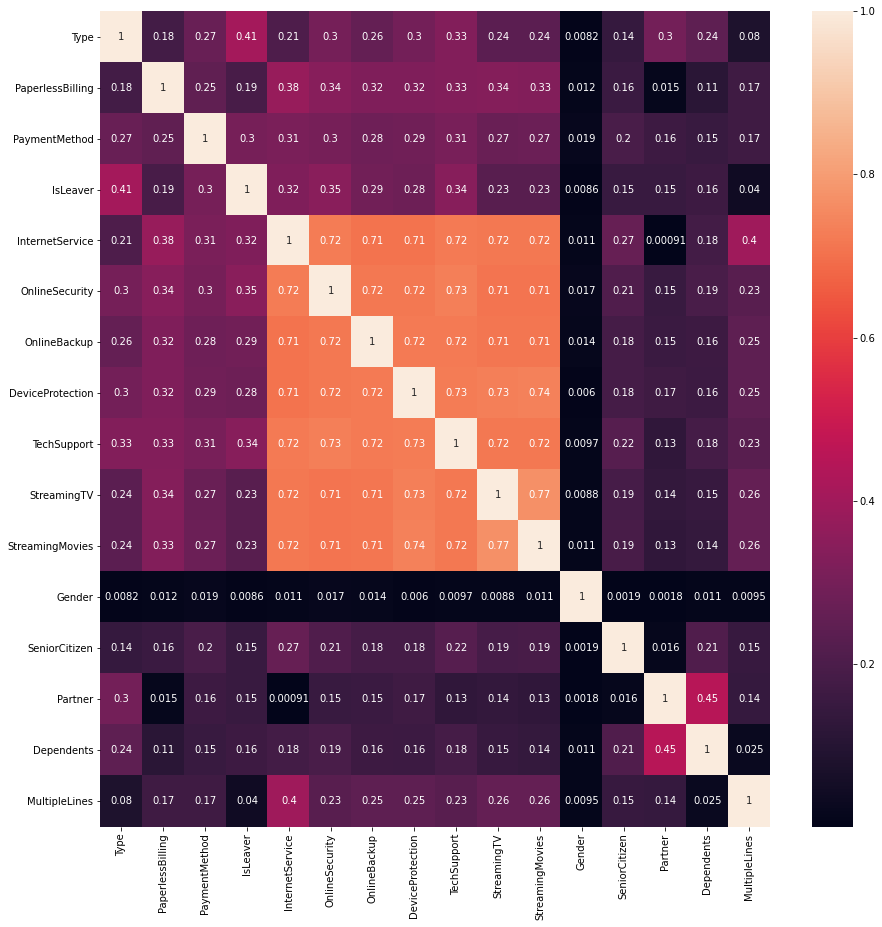

In [33]:
rcParams['figure.figsize'] = 15,15
sns.heatmap(alldata_cat_corr_matrix,
            annot = True,
            fmt='.2g');

<div class='alert alert-success'> 👍	
Круто что владеешь такой мощной техникой визуализации как тепловая карта. На ней не всегда видны корреляции между признаками. В такой ситуации стоит подумать о том, что возможно признаки имеют нелинейные связи. Для выявления таких нелинейных взаимосвязей я рекомендую дополнительно посмотреть на корреляцию Спирмена, а в идеале познакомиться с очень продвинутым коэффициентом корреляции Phik. С его помощью можно получать адекватные значения корреляции для данных любой природы. https://phik.readthedocs.io/en/latest/introduction.html


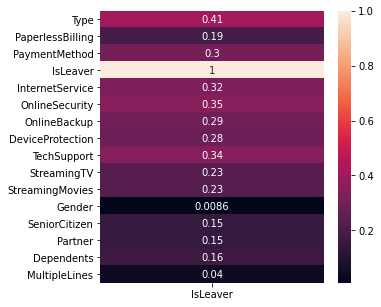

In [34]:
rcParams['figure.figsize'] = 5,5
sns.heatmap(alldata_cat_corr_matrix[['IsLeaver']],
            annot = True,
            fmt='.2g');

Полученные значения V Крамера можно разделить на две группы:
* V Крамера <= 0.20 - эффект незначительный;
* 0.20 < V Крамера <= 0.60 - эффект умеренный.

На целевой признак 'IsLeaver' следующие признаки влияют умеренно:
* Type;
* PaymentMethod;
* InternetService;
* OnlineSecurity;
* OnlineBackup;
* DeviceProtection;
* TechSupport;
* StreamingTV;
* StreamingMovies.

<b>Phik</b>

Рассмотрим корреляцию признаков по коэффициенту phik и по значению этих признаков.

In [35]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'CustomerLife']
phik_overview = alldata.phik_matrix(interval_cols=interval_cols)

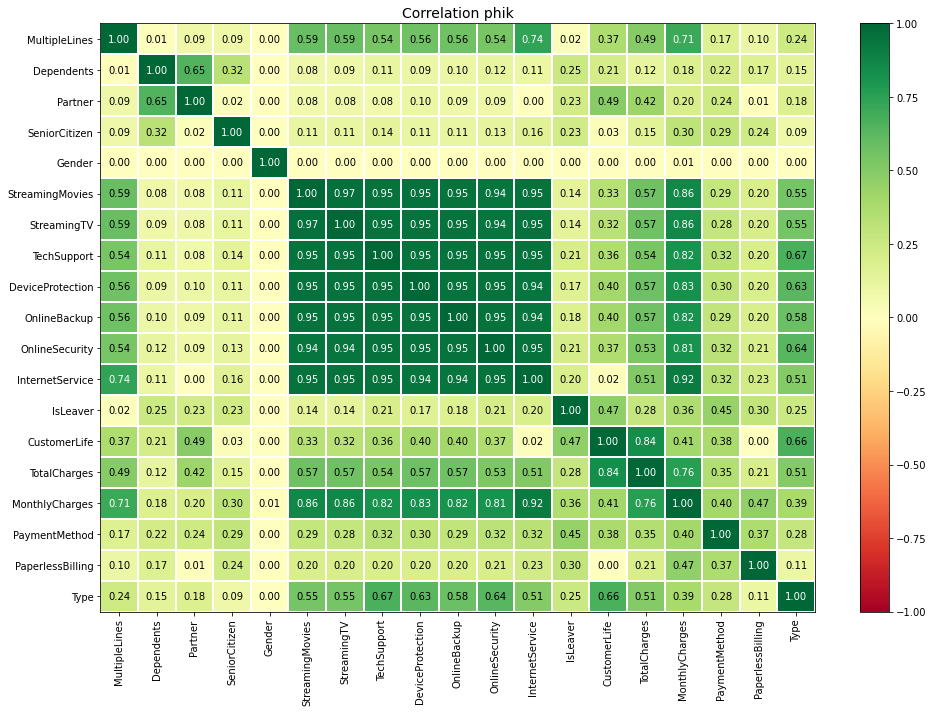

In [36]:
plot_correlation_matrix(phik_overview.fillna(0).values,
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index,
                        figsize=(14, 10),
                        title="Correlation phik")
plt.tight_layout()
plt.show();

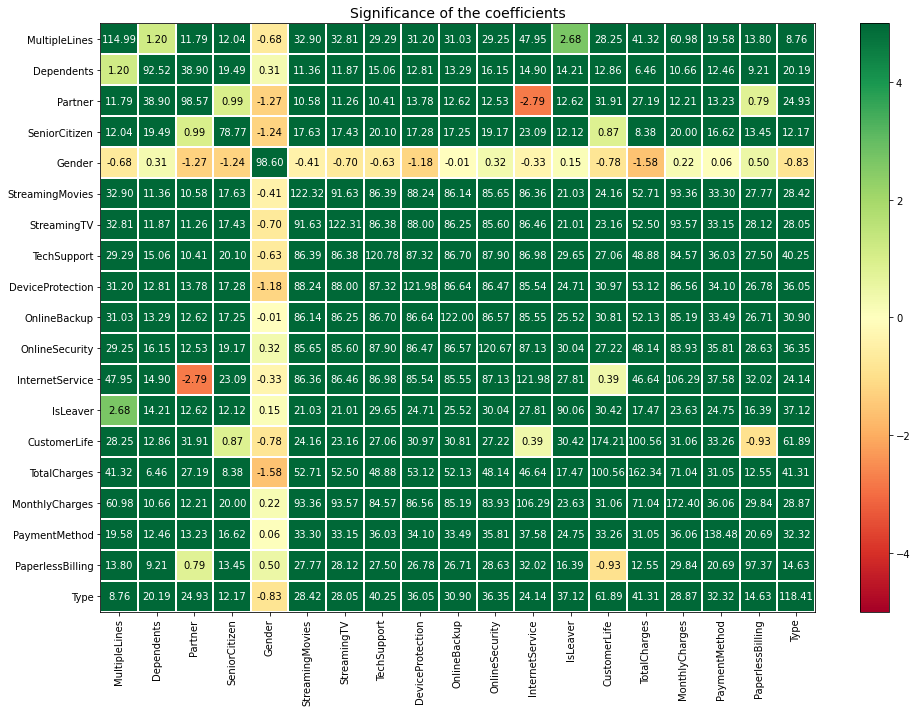

In [37]:
significance_overview = alldata.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index,
                        vmin=-5, vmax=5,
                        figsize=(14, 10), 
                        title="Significance of the coefficients")
plt.tight_layout()
plt.show();

Судя по коэффициенту корреляции phik и значимости коэффициентов - признак 'Gender' малозначителен, при этом у него очень слабая корреляция со всеми признаками, включая целевой 'IsLeaver'.

<b>Point-Biserial Correlation</b>

Рассчитаем корреляцию (Point-Biserial Correlation) между числовыми признаками ('MonthlyCharges', 'TotalCharges', 'CustomerLife') и целевым.

In [38]:
alldata['IsLeaver'] = alldata['IsLeaver'].astype(int)

In [39]:
MonthlyCharges = stats.pointbiserialr(alldata['IsLeaver'], alldata['MonthlyCharges'])
TotalCharges = stats.pointbiserialr(alldata['IsLeaver'], alldata['TotalCharges'])
CustomerLife = stats.pointbiserialr(alldata['IsLeaver'], alldata['CustomerLife'])

print(f"Корреляция между целевым признаком и 'MonthlyCharges' {MonthlyCharges[0]} при p-value {MonthlyCharges[1]}")
print(f"Корреляция между целевым признаком и 'TotalCharges' {TotalCharges[0]} при p-value {TotalCharges[1]}")
print(f"Корреляция между целевым признаком и 'CustomerLife' {CustomerLife[0]} при p-value {CustomerLife[1]}")

Корреляция между целевым признаком и 'MonthlyCharges' 0.19335642223784705 при p-value 2.70664560689116e-60
Корреляция между целевым признаком и 'TotalCharges' -0.19832426260399555 при p-value 2.1272116132420323e-63
Корреляция между целевым признаком и 'CustomerLife' -0.35222867011307785 при p-value 7.999057960599509e-205


Во всех результатах низкое значение p-value, но и значения корреляции не высоки у 'MonthlyCharges' и 'TotalCharges'. У 'CustomerLife' и целевого признака умеренная отрицательная корреляция.

Также посмотрим на распределение числовых признаков и целевого признака на матрице диаграмм рассеяния.

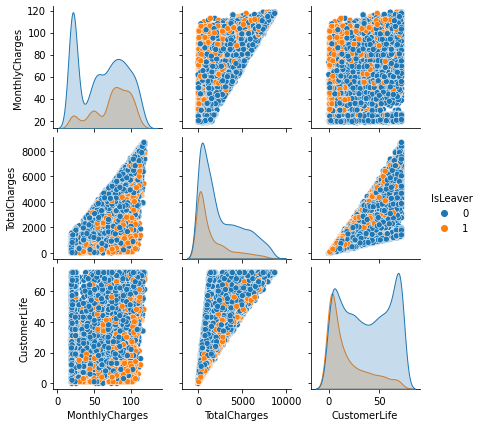

In [40]:
sns.pairplot(alldata, 
             vars=['MonthlyCharges', 'TotalCharges', 'CustomerLife'],
             hue='IsLeaver',
             height=2);

По результатам анализа различных коэффициентов корреляции удалим из данных признак 'Gender', остальные признаки оставим для дальнейшего моделирования.

<div class='alert alert-success'> 👍	
Ок, ты имеешь право отказаться от части признаков :) 

In [41]:
alldata = alldata.drop(['Gender'],
                       axis=1)

data_analyze(alldata)

Количество стобцов: 18
Количество строк: 7043


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,Dependents,MultipleLines
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,1,0,DSL,No,Yes,No,No,No,No,0,Yes,No,No Phone
5575-GNVDE,One year,No,Mailed check,56.95,1889.50,34,0,DSL,Yes,No,Yes,No,No,No,0,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,2,1,DSL,Yes,Yes,No,No,No,No,0,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,45,0,DSL,Yes,No,Yes,Yes,No,No,0,No,No,No Phone
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,2,1,Fiber optic,No,No,No,No,No,No,0,No,No,No


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerLife,IsLeaver,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,Dependents,MultipleLines
count,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043.0,7043,7043,7043
unique,3,2,4,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,2.0,2,2,3
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,Fiber optic,No,No,No,No,No,No,0.0,No,No,No
freq,3875,4171,2365,NaN,NaN,NaN,NaN,3096,3498,3088,3095,3473,2810,2785,5901.0,3641,4933,3390
mean,NaN,NaN,NaN,64.761692,2279.734304,32.371149,0.265370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.090047,2266.794470,24.559481,0.441561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,35.500000,398.550000,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.350000,1394.550000,29.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.850000,3786.600000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   CustomerLife      7043 non-null   int64  
 6   IsLeaver          7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  SeniorCitizen     7043 non-null   object 
 15  Partner           7043 non-null   object 
 16  Dependents        7043 non-null 

<div class='alert alert-warning'> ⚠️
В целом тебе удалось ознакомиться с данными, но визуализация получилось весьма скромной. Однако мне очень понравилось наличие матрицы корреляций. 

<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Добавил коэффициент phik, значимость коэффициента phik - в результате из данных был удалён только один признак - 'Gender'.</div>

## 3) Моделирование

Выделим из датафрейма целевой признак и признаки отдельно и разделим их на тренировочную и тестовую выборки. Объем тестовой выборки - 25%, разделение стратифицированное по целевому признаку.

In [42]:
features = alldata.drop(['IsLeaver'], axis=1).reset_index(drop=True)
target = alldata['IsLeaver'].reset_index(drop=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=RANDOM_STATE, 
                                                    stratify=target)

<div class='alert alert-success'> 👍	
Данные поделены корректно :) 

<b>RandomForestClassifier</b>

В качестве первой - более "простой" модели - будем использовать RandomForestClassifier. При этом столбцы будем обрабатывать с помощью OneHotEncoder (категориальные признаки) и StandartScaler (числовые признаки). Так как для поиска оптимальных гиперпараметров будет использован GridSearchCV, то жнкодер и скаляр будут вместе с моделью передаваться в пайплайне.

In [44]:
ohe_features = X_train.select_dtypes(include='object').columns.to_list()
#display(ohe_features) #проверка категориальных признаков для OHE
num_features = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
#display(num_features) #проверка категориальных признаков для скаляра

In [45]:
col_transformer = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'),
     ohe_features),
    (StandardScaler(), 
     num_features),
    remainder='passthrough',
    verbose_feature_names_out=False
)

<div class='alert alert-danger'> ⛔️ вер 2
Обрати внимание код падает! 

<div class='alert alert-success'> 👍	
Здорово, что владеешь пайплайнами! 

In [46]:
model_rfc = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')
pipline_rfc = make_pipeline(col_transformer, model_rfc)

param_grid_rfc = {
    'randomforestclassifier__n_estimators': range(50, 351, 50),
    'randomforestclassifier__max_depth': range(2, 15),
    'randomforestclassifier__min_samples_split': (2, 3, 4),
    'randomforestclassifier__min_samples_leaf': (3, 4, 5, 6)
}

In [47]:
gs_rfc = GridSearchCV(pipline_rfc, 
                      param_grid=param_grid_rfc, 
                      scoring='roc_auc', 
                      n_jobs=-1)

In [48]:
%%time
gs_rfc.fit(X_train, y_train)
print(f'Лучший результат ROC-AUC: {gs_rfc.best_score_}, при следующих параметрах: {gs_rfc.best_params_}')

Лучший результат ROC-AUC: 0.8473721412979105, при следующих параметрах: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__min_samples_leaf': 6, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 300}
CPU times: user 1h 9min 26s, sys: 26.1 s, total: 1h 9min 52s
Wall time: 1h 9min 53s


<div class='alert alert-success'> 👍	
Лес обучен корректно! 

<b>CatBoostClassifier</b>

В качестве второй модели возьмём CatBoostClassifier - эта модель имеет внутреннюю обработку категориальных признаков. Исходя из этого поиск гиперпараметров будем проводить в двух вариациях - с подготовкой столбцов как для предыдущей модели (энкодер + скаляр) и с использованием встроенной обработки.

<b> CatBoostClassifier с внешней подготовкой </b>

In [49]:
model_cb = CatBoostClassifier(random_state=RANDOM_STATE, 
                              verbose=False, 
                              auto_class_weights='Balanced',
                              loss_function='Logloss')
pipline_cb = make_pipeline(col_transformer, model_cb)

param_grid_cb = {
    'catboostclassifier__learning_rate': (0.1, 0.01, 0.005),
    'catboostclassifier__depth': (6, 8, 10),
    'catboostclassifier__iterations': range(50, 501, 50)
}

In [50]:
gs_cb = GridSearchCV(pipline_cb, 
                      param_grid=param_grid_cb, 
                      scoring='roc_auc', 
                      n_jobs=-1)

In [51]:
%%time
gs_cb.fit(X_train, y_train)
print(f'Лучший результат ROC-AUC: {gs_cb.best_score_}, при следующих параметрах: {gs_cb.best_params_}')

Лучший результат ROC-AUC: 0.8492409027300983, при следующих параметрах: {'catboostclassifier__depth': 6, 'catboostclassifier__iterations': 350, 'catboostclassifier__learning_rate': 0.01}
CPU times: user 24min 10s, sys: 21.4 s, total: 24min 32s
Wall time: 30min 8s


<div class='alert alert-success'> 👍	
Катбуст обучен корректно !

<b> CatBoostClassifier с встроенной обработкой </b>

In [52]:
model_cb_clear = CatBoostClassifier(random_state=RANDOM_STATE, 
                                    verbose=False, 
                                    cat_features=ohe_features, 
                                    auto_class_weights='Balanced',
                                    loss_function='Logloss')

param_grid_cb_clear = {
    'learning_rate': (0.1, 0.01),
    'depth': (4, 6, 8, 10),
    'iterations': range(50, 201, 50)
}

In [53]:
gs_cb_clear = GridSearchCV(model_cb_clear, 
                           param_grid=param_grid_cb_clear, 
                           scoring='roc_auc', 
                           n_jobs=-1)

In [54]:
%%time
gs_cb_clear.fit(X_train, y_train)
print(f'Лучший результат ROC-AUC: {gs_cb_clear.best_score_}, при следующих параметрах: {gs_cb_clear.best_params_}')

Лучший результат ROC-AUC: 0.8487395472460548, при следующих параметрах: {'depth': 4, 'iterations': 150, 'learning_rate': 0.1}
CPU times: user 4min 14s, sys: 13 s, total: 4min 27s
Wall time: 6min 10s


<div class='alert alert-success'> 👍	
Отличный результат! Круто, что ручаня обработка обогнала даже :) 

<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Не могу добиться нужной метрики ROC_AUC, хотя вроде делаю всё правильно. Плюс ниже - при попытке посчитать на тестовых данных, преобразованных транформатором столбцов (тем же, что в пайплайне) - модель всё равно ожидает "обычные" входные данные. Подскажи пожалуйста, в чём ошибка? :с</div>

<div class='alert alert-danger'> ⛔️
Зачем оборачивать что-то в пандас? 

<div class='alert alert-danger'> ⛔️
тут нужно будет исправить

<div class='alert alert-danger'> ⛔️
Обрати внимание на документацию roc-auc-score, тебе нужно в правильном формате получить предсказания и передать их на вход. Обрати внимание на то, что ты предсказываешь. Также построй еще рок кривую и выведи важность признаков 

<div class='alert alert-success'>👍 вер 2
Отличная работа :) Рад, что удалось побороть эту проблему, она довольно часто возникает на самом деле 

<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Всё, вопросы сняты, вроде разобрался, паззл сошёлся :)</div>

<b>Промежуточный итог </b>

С применением подбора гиперпараметров и кроссвалидации на тренировочных данных было испытано три модели, которые показали следующие результаты:
* RandomForestClassifier - ROC-AUC 0.847;
* <b>CatBoostClassifier (с ручной обработкой признаков) - ROC-AUC 0.849</b>;
* CatBoostClassifier (с встроенной обработкой признаков) - ROC-AUC 0.848.

Для испытания на тестовых данных будет использована модель с наибольшим значением ROC-AUC на кроссвалидации - CatBoostClassifier (с ручной обработкой признаков) с использованием следующих гиперпараметров:
* depth=6,
* iterations=350,
* learning_rate=0.01,
* auto_class_weights='Balanced';
* loss_function='Logloss'.

## 4) Тестирование

Выбранная модель - CatBoostClassifier (с ручной обработкой признаков) - ROC-AUC 0.849 - с подобранными гиперпараметрами уже сохранена в переменной gs_cb.

In [55]:
predict = gs_cb.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, predict)
print(f'Значение ROC-AUC на тестовых данных {score}')

Значение ROC-AUC на тестовых данных 0.8514557387249337


Целью было достижение значение ROC-AUC > 0.85 - полученная модель удовлетворяет этому условию.

Также построим график ROC-кривой.

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, predict)

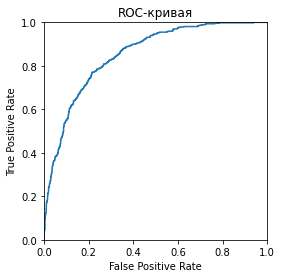

In [57]:
rcParams['figure.figsize'] = 4,4
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

<div class='alert alert-success'>👍 вер 2
Хороший результат! 

# Вывод

Целью исследования было создание модели бинарной классификации для предсказания поведения клиентов компании по предоставлению услуг связи. Классификация должна производиться по признаку - перестал клиент пользоваться услугами компании или нет. Итоговая модель должна удовлетворять условию - метрика ROC-AUC должна быть больше 0.85.

<b> Изменения в исходном плане </b>

Перед началом исследования был составлен план из четырёх основных пунктов, который был выполнен с некоторыми изменениями:
* в рамках исследовательского анализа данных были посчитаны несколько коэффициентов корреляции и матрицы корреляции с построением "тепловых карт" коэффициентов корреляции;
* в рамках моделирования модель CatBoostClassifier была создана и испытана дважды для сравнения ручной и встроенной обработки категориальных признаков.

<b> Трудности и их преодоление </b>

В ходе работы были встречены трудности по переносу кода с локальной машины на предоставленное для проверки облачное пространство связанное с отсутствием в облочном окружении некоторых используемых библиотек или их устарвшие версии. Для решения этой проблемы в версии для исполнения в "тренажёре" были добавлены ячейки с загрузкой и обновлением недостающих и устаревших библиотек.

<b> Ключевые шаги в решении </b>

Рассмотрим основные шаги по первоначальному плану и что в рамках этих шагов было выполнено:

<b> 1) Исходные данные и предобработка </b>

Для исследования были предоставлены несколько файлов, содержащие данные о клиентах компании и оказываемых услугах:
* contract - общие данные о всех контрактах;
* internet - данные о клиентах, пользующихся услугами интернета;
* personal - семейные данные о клиентах;
* phone - данные о клиентах, пользующихся услугами телефонной связи.

В ходе предобработки были обработаны скрытые пропуски, выделен целевой признак ('IsLeaver'), создан новый признак - длительность жизни контракта ('CustomerLife'), удалены признаки, ведущие к даталику (даты). После предобработки данные были объеденены в общую рабочую талицу, в которой были заполнены пропуски.

<b> 2) Исследовательский анализ данных </b>

Для оценки корреляций признаков в рабочей таблице были использованы три коэффициента корреляции:
* V Крамера - для категориальных признаков;
* Phik - для всех признаков;
* Point-Biserial Correlation - между числовыми признаками и целевым.

По оценке коэффициентов корреляции был удалён один признак - 'Gender'.

<b> 3) Моделирование </b>

Для моделирования данные из рабочей таблицы был выделен целевой признак отдельно, после чего данные были стратифицированно разделены на тренировочную (75%) и тестовую (25%) выборки.

Для испытания выбраны две модели - RandomForestClassifier и CatBoostClassifier, при этом CatBoostClassifier был испытан дважды - с ручной обработкой признаков и встроеной. Для ручной подготовки данных в ходе моделирования был создан пайплайн обработки признаков - категориальные признаки обрабатывались с помощью OneHotEncoder, а числовые - масштабировались с помощью StandardScaler. Для подбора гиперпараметров использовался GridSearchCV.

По результату моделирования лучшей оказалась модель CatBoostClassifier с ручной обработкой признаков, эта модель выбрана для тестирования.

<b> 4) Тестирование </b>

В ходе тестирования модель CatBoostClassifier с ручной обработкой признаков была испытана на тестовых данных и показала результат ROC-AUC 0.851 > требуемое значение ROC-AUC 0.85.

<b> Структура итоговой модели и признаков </b>

Целевой признак:
* IsLeaver.

Использeемые категориальные признаки:
* Type;
* PaperlessBilling;
* PaymentMethod;
* InternetService;
* OnlineSecurity;
* OnlineBackup;
* DeviceProtection;
* TechSupport;
* StreamingTV;
* StreamingMovies;
* SeniorCitizen;
* Partner;
* Dependents;
* MultipleLines.

Числовые признаки:
* MonthlyCharges;
* TotalCharges;
* CustomerLife.

Пайплайн col_transformer для обработки колонок:
* OneHotEncoder - для категориальных признаков;
* StandarScaler - для числовых признаков.

Гипермараметры модели CatBoostClassifier:
* depth=6,
* iterations=350,
* learning_rate=0.01,
* auto_class_weights='Balanced';
* loss_function='Logloss'.

Также снизу будет приведена матрица ошибок и важность признаков.

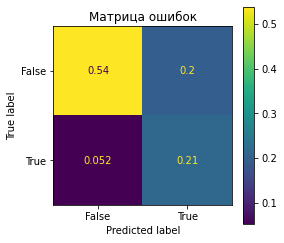

In [58]:
predict_class = gs_cb.predict(X_test)
con_matrix = confusion_matrix(y_test, predict_class, normalize='all')
cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Матрица ошибок')
plt.show();

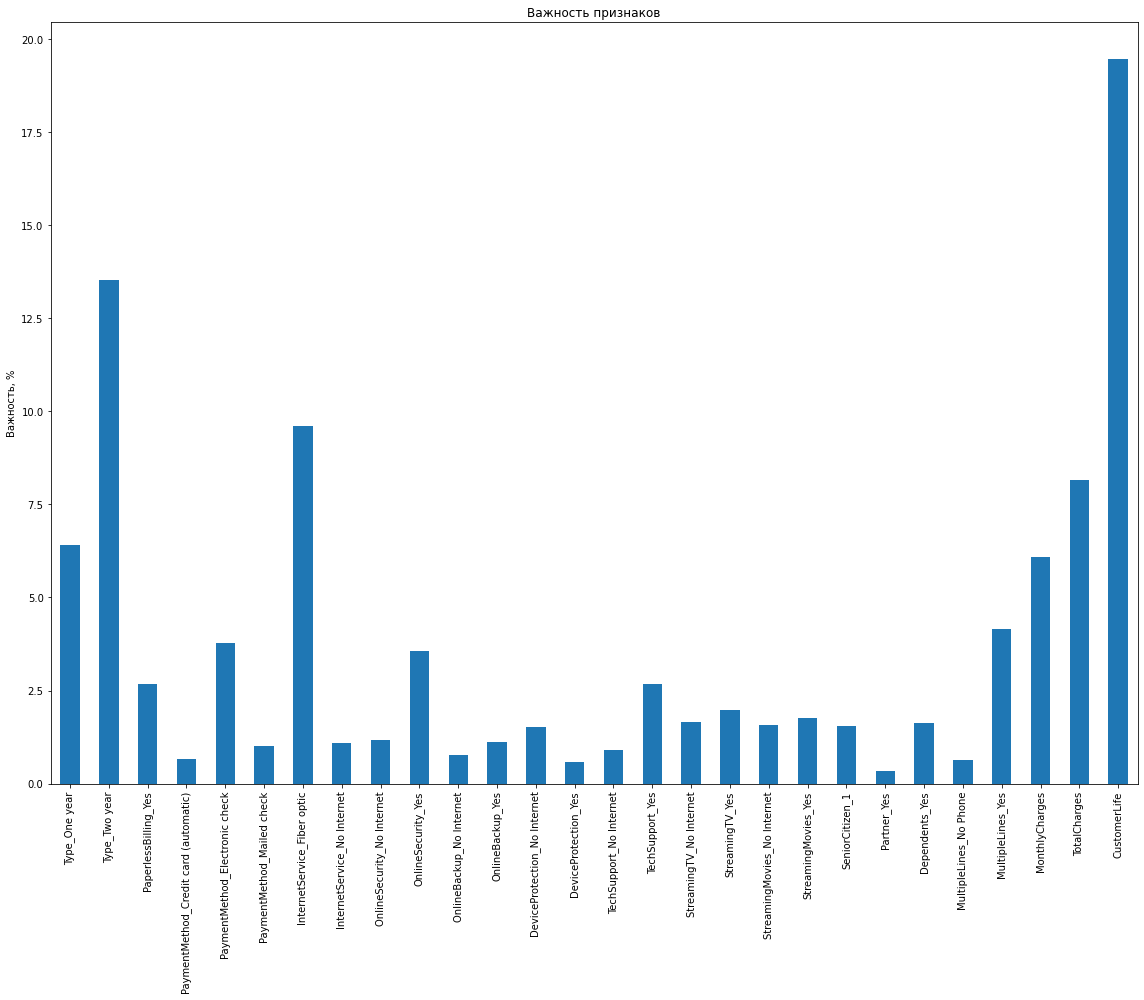

In [59]:
fet_names = gs_cb.best_estimator_[:-1].get_feature_names_out()
importances = gs_cb.best_estimator_._final_estimator.get_feature_importance()

cat_imp = pd.Series(importances, fet_names)

fig, ax = plt.subplots(figsize=(16,14))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

<div class='alert alert-danger'>⛔️
Не хватает итогового списка признаков, а также способа предобработки. Выведи также feature iprotance и матрицу ошибок 

<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Прошу принять пока 2 часть - с моделированием, вывод доработаю при сдаче, собственно, отчёта. Извиняюсь, что его наличием ввёл в заблуждение.</div>

<div class='alert alert-success'> 👍 вер 2
отправляй работу на следующщий этап :) 

<div class='alert alert-success'> 👍 
Спасибо за отчет, это важный навык который пригодится на работе для документации модели. Поэтому важно уметь описывать проделанную работу так, чтобы в будущем открыв данный отчет человек мог понять как получить результат, который был достигнут тобой. Обрати внимание, что ты не ответил на все вопросы, которые заданы в тренажере на этапе отчета. Например:
Какие пункты плана были выполнены, а какие — нет. Почему?
    
Какие трудности возникли и как вы их преодолели?
    
Какие ключевые шаги в решении задачи вы выделили?
    
    

<div class='alert alert-danger'> ⛔️
У тебя падает код, к сожалению придется поправить это. Не заметил этого раньше, проверяй код перед отправкой в тренажере. Возможно тут нужно обновить некоторые библиотеки! 

<div style="background:#CCFFFF; color:#000; padding:10px">
    <p><big><b> Комментарий студента: </b></big></p>
Обновил библиотеку, проверил в тренажёре - теперь совсем всё работает с:</div>

<div class='alert alert-success'> 👍
<b> Индивидуальная обратная связь </b>

Привет еще раз! 🖐  Я к тебе с обратной связью по финальному спринту. Но сначала хочу тебя поздравить с окончанием этого длинного пути и поблагодарить за твои старания во время учебы! 🚀

На мой взгляд в своей работе ты уделил недостаточно внимания визуализации данных. Данный шаг является по сути ключевым на этапе анализа данных. Именно с его помощью можно понять характер взаимосвязей между признаками. Чтобы ты всегда мог делать качественную визуализацию затрачивая на это минимум энергии, рекомендую тебе держать под рукой галерею примеров библиотеки seaborn.  А если хочешь стать настоящим гуру визуализации и дашбордов, то погружайся в изучение библиотеки plotly. С её помощью можно строить интерактивные графики любой сложности.
    
Мне понравились твои навыки написания кода. Ты хорошо умеешь автоматизировать рутинные процессы, пишешь разборчивый и понятный код. Очень порадовало в твоем коде наличие пайплайнов – это делает код более читаемым и воспроизводимым. Также помни про стандарт pep8, чтобы ты всегда знал чего не хватает в твоем коде можешь обращаться за помощью к данному (http://pep8online.com/) инструменту. 
    
Я заметил что ты помимо продвинутых бустингов также использовал и более простые, классические модели. В будущем также не забывай про простые модели, в связке с хорошей предобработкой они дают качество которое, зачастую, сложно превзойти с помощью более продвинутых бустингов. Однако у такого подхода есть преимущество в простой интерпретации и скорости работы.
    
Мне понравилось что ты не пропустил важный этап подбора оптимальных гиперпараметров. Я заметил что ты это сделал с помощью перебора по сетке. Данная техника дает гарантированно высокое качество, однако у неё есть значительный недостаток в виде продолжительности работы. Чтобы в будущем ты мог еще быстрее получать высокое качество метрик рекомендую тебе освоить библиотеку hyperopt (http://hyperopt.github.io/hyperopt/).
    
На мой взгляд ты хорошо проявил свои навыки работы с данными. Чтобы ты мог выделяться на фоне других специалистов тебе будет полезно углубиться в какую ни будь более узкую область моделирования и приобрести уникальные навыки. Очень востребованным является умение грамотно проводить А/В тестирование. Рекомендую тебе для погружения в тему изучить блог на хабре (https://habr.com/ru/post/242701/).
    

Тебе также для будущей работы стоит прокачать следующие знания/навыки: <ul>
<li>Docker для контейниризации твоих моделей с целью дальнейшего встраивания в продакшн
<li>Прокачать навыки SQL, все работодатели хотят чтобы дата саентисты могли самостоятельно собирать данные 
<li>Очень важно иметь полное понимание работы метрик Precision, Recall, F, AUC. Методы отбора и оценки важности фичей. Разница  между стэкингом, бэггингом и бустингом.
<li> Понимание работы бустинга над деревьями. – вопросы по этим тема практически всегда поднимаются на собеседовании